In [2]:
import numpy as np
from scipy.io import loadmat
import pandas as pd

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [22]:
#######
# Functions
#######

# Plotting Functions

import matplotlib.pyplot as plt

def scatterPlot(x,y,c, p=None):
    # makes a scatter Plot of the data and colors the true classes. 
    # The true classes are depicted by the dots, whereas the predicted classes by a circle around
    # Plot first class True
    x1 = x[(c==0).flatten()]
    y1 = y[(c==0).flatten()]
    plt.plot(x1,y1, 'b.', label='true class 1 ')
    # Plot second class True
    x2 = x[(c==1).flatten()]
    y2 = y[(c==1).flatten()]
    plt.plot(x2,y2, 'r.', label = 'true class 2')
    
    if p is not None:
        # Plot first class Predicted
        x1 = x[(p<0.5).flatten()]
        y1 = y[(p<0.5).flatten()]
        plt.plot(x1,y1, 'yo', label='pred class 1',
        markersize=8, markerfacecolor='None', markeredgewidth=2, zorder=1)
        # Plot second class Predicted
        x2 = x[(p>=0.5).flatten()]
        y2 = y[(p>=0.5).flatten()]
        plt.plot(x2,y2, 'mo', label='pred class 2', markersize=8, markerfacecolor='None', markeredgewidth=2, zorder=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Functions for IRLS alg.

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def pc1(weights, phi): # p(c1|Phi) = y(Phi)
    return sigmoid(np.dot(phi,weights))
def R_func(y):
    R = np.zeros([len(y), len(y)])
    for i in range(0, len(y)):
        R[i,i] = y[i]*(1-y[i])
    return R
def w_new(w_old, phi, t): # The update Rule
    # convert everything to numpy matrices so we can write the code cleaner
    y = np.asmatrix(pc1(w_old, phi))
    t = np.asmatrix(t)
    R = np.asmatrix(R_func(y))
    phi = np.asmatrix(phi)
    w_new = w_old - np.linalg.inv(phi.T * R * phi) * phi.T * (y-t)
    return w_new

def ILRS(w, phi, t, n):
    # Iterate n times the ILRS alg for logistic regression (see Bishop Eq. 4.99)
    weights = [w]
    for i in range(0,n):
        w = w_new(w, phi, t) # apply eq. 4.99 for updating w
        weights.append(w)
    # Reshape the weights and convert to numpy array to use them later for plotting
    weights = np.asarray(weights)
    w_shape = np.shape(weights)
    weights = np.reshape(weights, [w_shape[0], w_shape[1]])
    return w, weights

def crossEntropyError(t, y):
    error = 0
    for i in range(0,len(t)):
        E_n = t[i]*np.log(y[i]) + (1-t[i])*np.log(1-y[i])
        error = error - E_n
    return error



In [23]:
# MAIN

# Random Multivariate Sampling 
# Random Sampling Function used from
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal
from scipy.stats import multivariate_normal

# Load the data
df = pd.read_csv('a010_irlsdata.txt', header=None, delimiter='\s+')
X = np.asarray(df.iloc[:, 0:2])
C = np.asarray(df.iloc[:,2])

######
# Deploy w_new function for dummy function
######
w_init = np.asmatrix([0.0,0.0, 0.0]).T # Initialize weights
phi_dummy = np.asmatrix([np.ones(len(X[:,0])), X[:,0], X[:,1]]).T 
t = np.asmatrix(C).T

w_dummy, weights_dummy = ILRS(w_init, phi_dummy, t, 10)
# Now use weights for making predictions
pred_dummy = np.asarray(pc1(w_dummy, phi_dummy))
# Also Calculate the initial pred with the initial weights for comparison
pred_init = np.asarray(pc1(w_init,phi_dummy))


######
# Deploy w_new function for Gaussian Functions
######

w_init_g = np.asmatrix([0.0,0.0, 0.0]).T # Initialize weights
mu1 = np.asarray([0,0])
mu2 = np.asarray([1,1])
cov = np.asmatrix([[0.2, 0], [0, 0.2]])

# Now do the trick for Guassian sampling
rstate = 42 # random state to produce always the same 'random' sampling
mv1 = multivariate_normal(mu1, cov) # Initialize Multivariate Gaussian 1
mv2 = multivariate_normal(mu2, cov) # Initialize Multivariate Gaussian 2
phi1 = np.asarray(mv1.pdf(X))
phi2 = np.asarray(mv2.pdf(X))
phi_gauss = np.asmatrix([np.ones(len(X[:,0])), phi1, phi2]).T 

w_gauss, weights_gauss = ILRS(w_init_g, phi_gauss, t, 10)
# Now use weights for making predictions
pred_gauss = np.asarray(pc1(w_gauss, phi_gauss))
pred_ginit = np.asarray(pc1(w_init_g,phi_gauss))

##########
# Calculate Cross Entropies
##########
eInit = crossEntropyError(C, pred_init.ravel())
eNew = crossEntropyError(C, pred_dummy.ravel())
eGauss_init = crossEntropyError(C, pred_ginit.ravel())
eGauss = crossEntropyError(C, pred_gauss.ravel())
print eInit
print eNew
print eGauss_init
print eGauss

693.14718056
692.969359483
693.14718056
346.504080461


In [26]:
# Le Schmierbabier
pred_ginit

array([[ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0

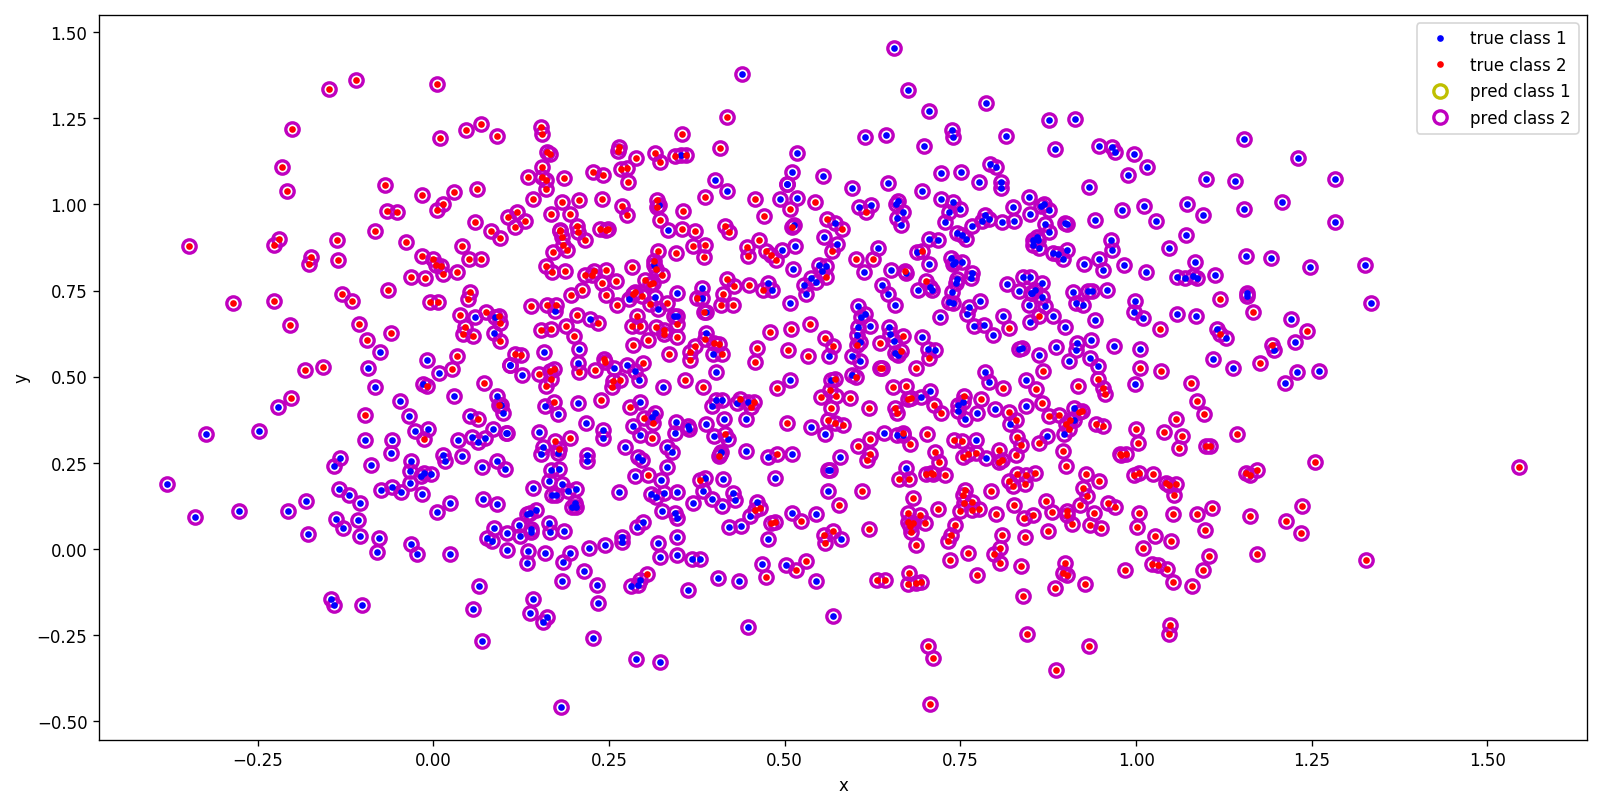

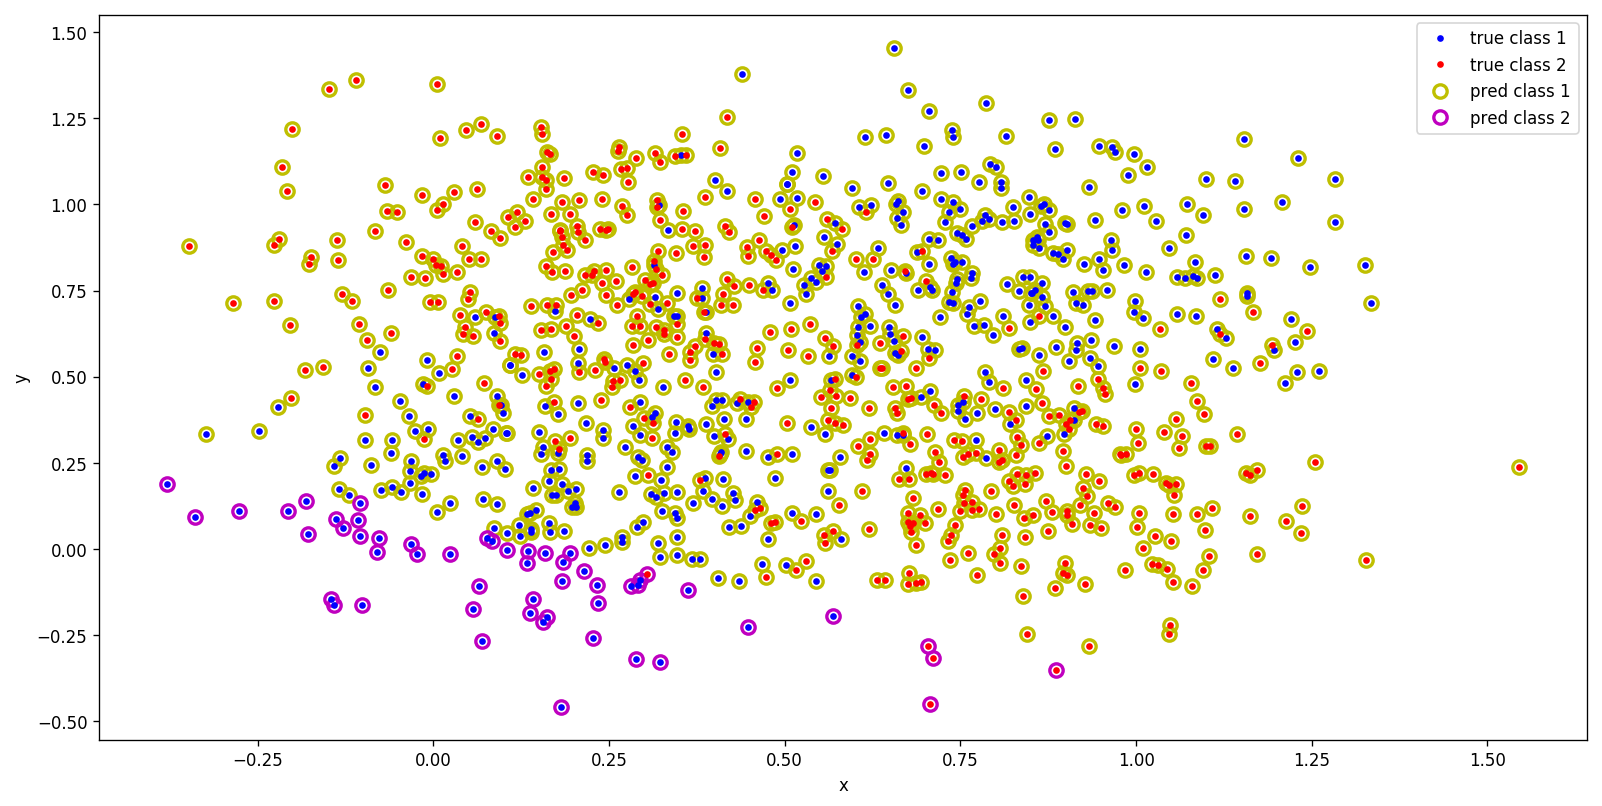

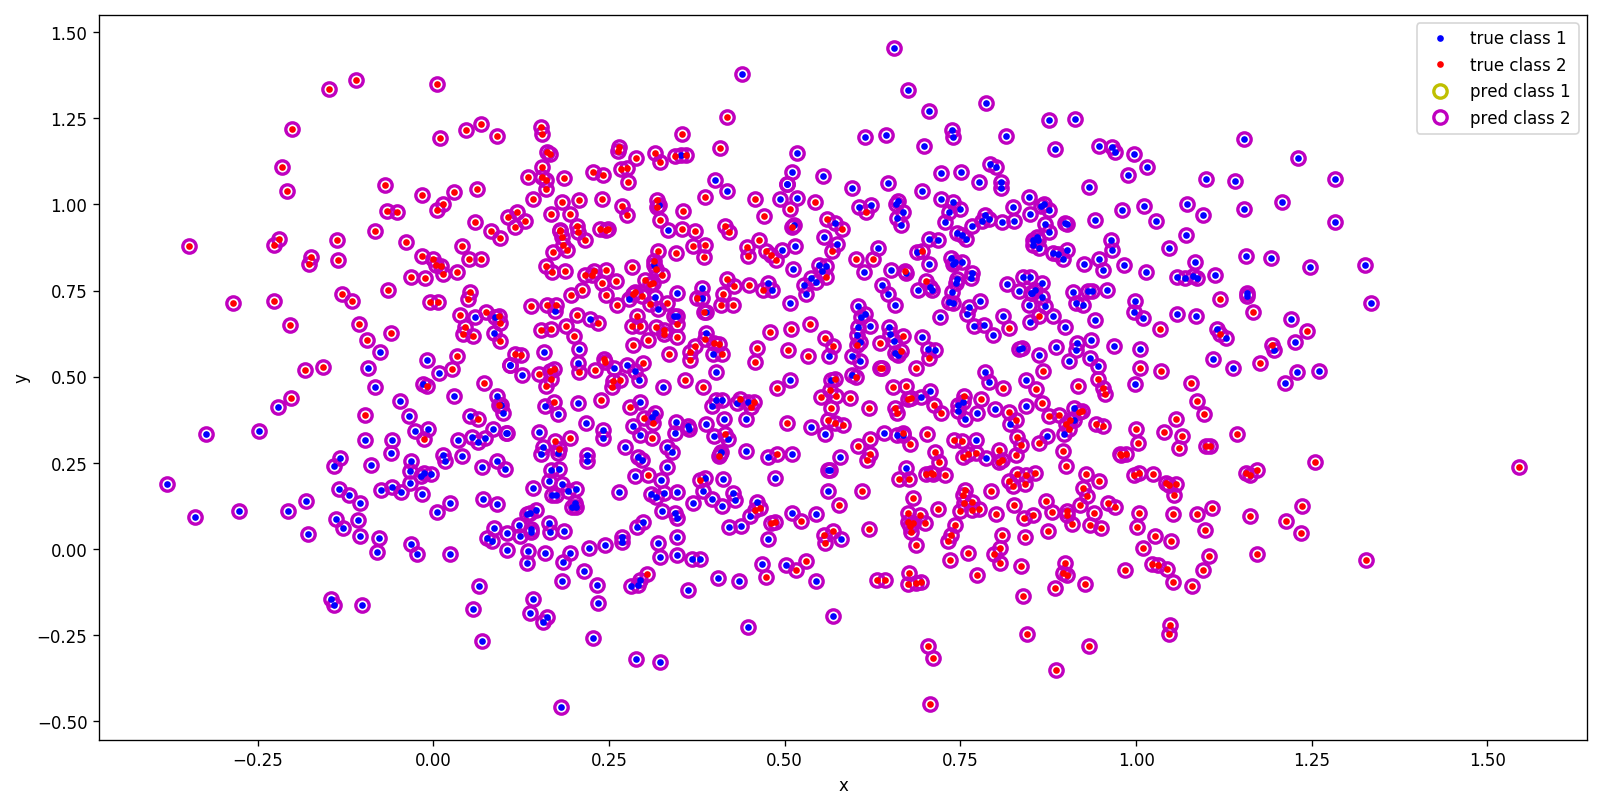

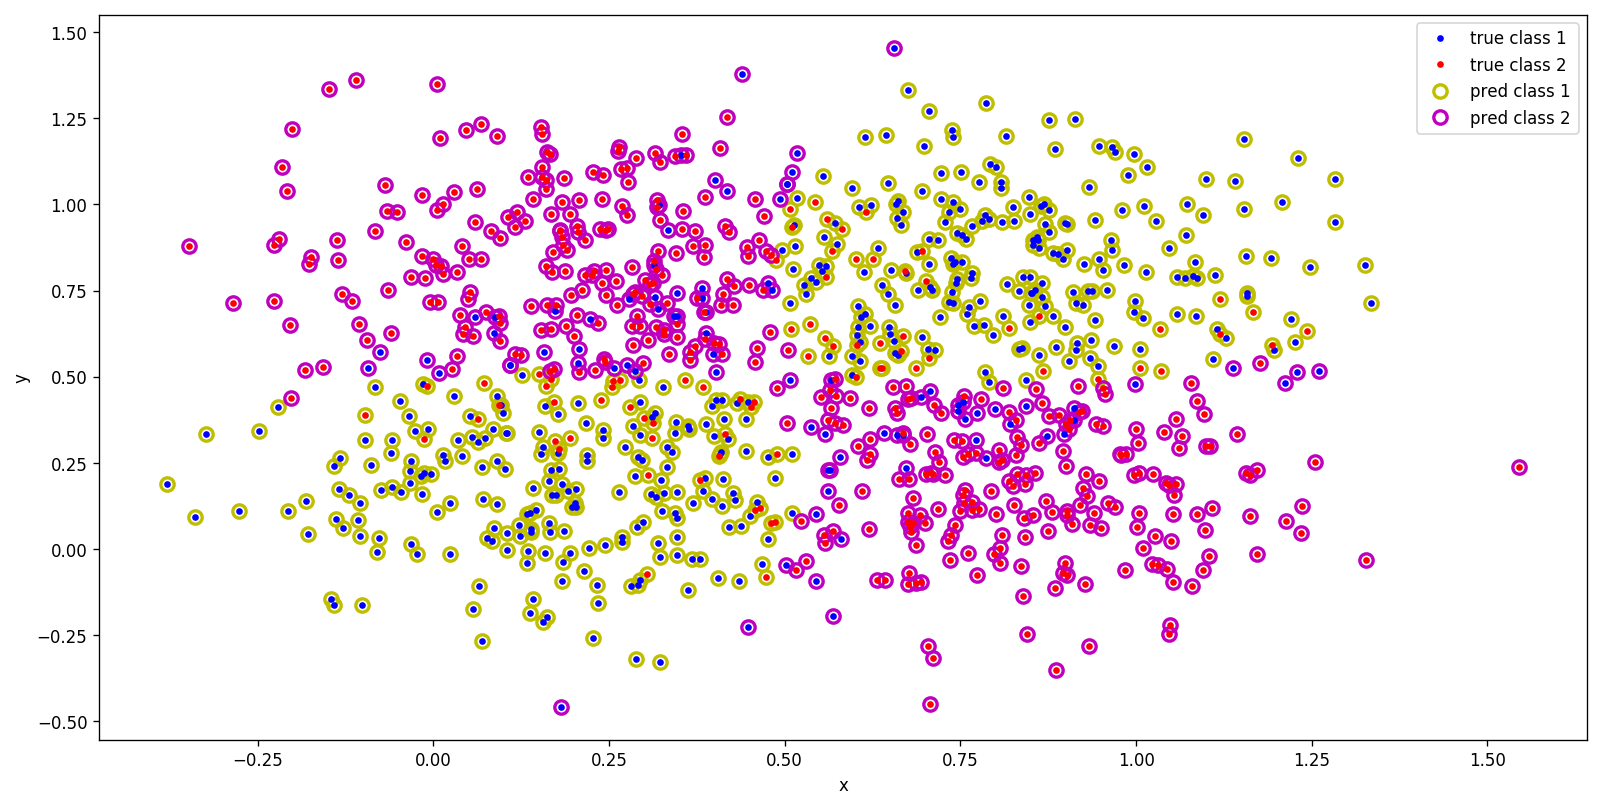

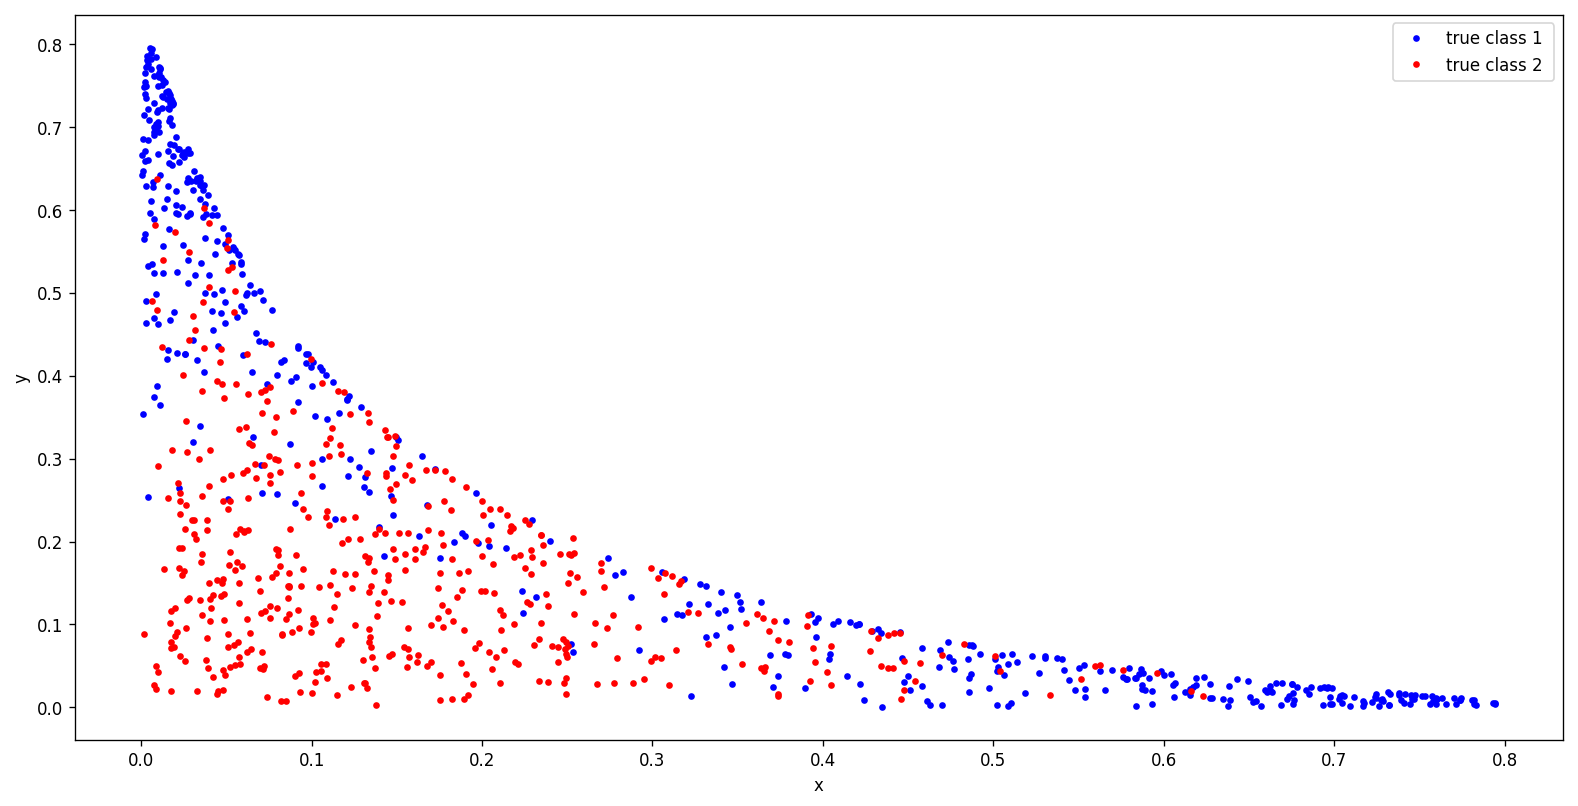

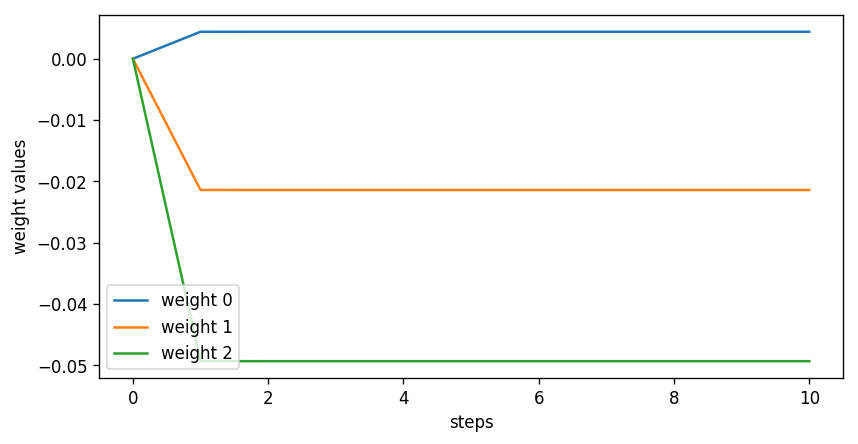

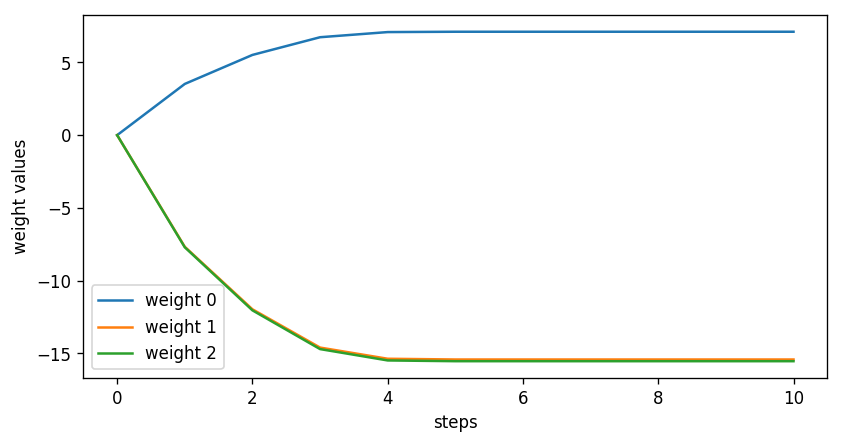

In [24]:
######
# PLOTS
#######

# Scatter Plots
predictions = [pred_init, pred_dummy, pred_ginit, pred_gauss]
modelnames = ['dummy_init', 'dummy_converged', 'gauss_init', 'gauss_converged']
for model, modelname in zip(predictions, modelnames):
    fig1 = plt.figure(1, figsize=(16,8), dpi=120)
    scatterPlot(X[:,0], X[:,1], C, model)
    fig1.savefig(modelname)
    
# Scatter Plot of Feature Domain
fig3 = plt.figure(3, figsize=(16,8), dpi=120)
scatterPlot(phi1, phi2, C)
fig3.savefig('feature-space')
    
# Weights Evolvement Plot
weights = [weights_dummy, weights_gauss]
modelnames = ['weights_dummy', 'weights_gauss']
for weight, modelname in zip (weights, modelnames):
    weight = np.asarray(weight)
    w_shape = weight.shape
    fig2 = plt.figure(2, figsize=(8,4), dpi=120)
    for i in range(0,w_shape[1]):
        plt.plot(range(0, w_shape[0]), weight[:,i], label='weight {}'.format(i))
    plt.legend()
    plt.xlabel('steps')
    plt.ylabel('weight values')
    plt.show()
    fig2.savefig(modelname)
